### Read data

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

paths = ['data/train.csv', 'data/test.csv']
train = ps.read_csv(paths[0])
test = ps.read_csv(paths[1])
print (train.head()) #display the data

   id                                              tweet         state  \
0   1                Jazz for a Rainy Afternoon:  {link}      oklahoma   
1   2                   RT: @mention: I love rainy days.       florida   
2   3  Good Morning Chicago! Time to kick the Windy C...         idaho   
3   6  Preach lol! :) RT @mention: #alliwantis this t...     minnesota   
4   9                     @mention good morning sunshine  rhode island   

               location   s1   s2   s3     s4     s5     w1 ...    k6     k7  \
0              Oklahoma  0.0  0.0  1.0  0.000  0.000  0.800 ...   0.0  0.000   
1  Miami-Ft. Lauderdale  0.0  0.0  0.0  1.000  0.000  0.196 ...   0.0  0.000   
2                   NaN  0.0  0.0  0.0  0.000  1.000  0.000 ...   0.0  1.000   
3  Minneapolis-St. Paul  0.0  0.0  0.0  1.000  0.000  1.000 ...   0.0  0.604   
4             Purgatory  0.0  0.0  0.0  0.403  0.597  1.000 ...   0.0  0.000   

    k8     k9  k10  k11  k12    k13  k14  k15  
0  0.0  0.000  1.0  0.0  0

### Data sizes

In [2]:
print("Train instances: %r" %(len(train)))
print("Test instances: %r" %(len(test)))

Train instances: 77946
Test instances: 42157


### Sentiment labels

In [3]:
sentiment_counts = [0,0,0,0,0]
for index, row in train.iterrows():
    sentiment_counts = [x + y for x, y in zip(sentiment_counts, row[4:9])]

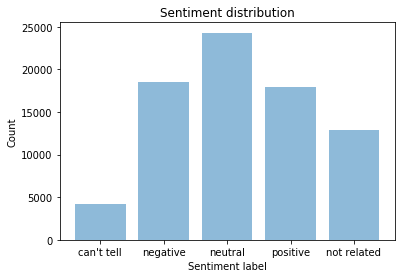

In [8]:
objects = ("can't tell","negative","neutral","positive","not related")
y_pos = np.arange(len(objects))
plt.bar(y_pos, sentiment_counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment label')
plt.show()

### When labels

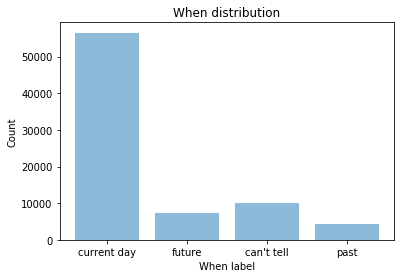

In [9]:
when_counts = [0,0,0,0]
for index, row in train.iterrows():
    when_counts = [x + y for x, y in zip(when_counts, row[9:13])]
    
w_labels = ("current day","future","can't tell","past")
y_pos = np.arange(len(w_labels))
plt.bar(y_pos, when_counts, align='center', alpha=0.5)
plt.xticks(y_pos, w_labels)
plt.ylabel('Count')
plt.title("When distribution")
plt.xlabel('When label')
plt.show()

### Kind labels

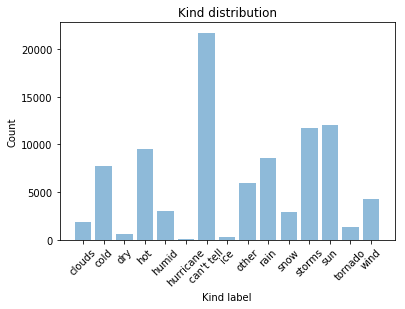

In [10]:
kind_counts = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for index, row in train.iterrows():
    kind_counts = [x + y for x, y in zip(kind_counts, row[13:29])]
    
k_labels = ("clouds","cold","dry","hot","humid","hurricane","can't tell","ice","other","rain","snow","storms","sun","tornado","wind")
y_pos = np.arange(len(k_labels))
plt.bar(y_pos, kind_counts, align='center', alpha=0.5)
plt.xticks(y_pos, k_labels,rotation=45)
plt.ylabel('Count')
plt.title("Kind distribution")
plt.xlabel('Kind label')
plt.show()

### Correlations between variables

In [ ]:
features=list(['s1','s2','s3','s4','s5','w1','w2','w3','w4','k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15'])

correlations = train[['s1','s2','s3','s4','s5','w1','w2','w3','w4','k1','k2','k3','k4','k5','k6','k7','k8','k9','k10','k11','k12','k13','k14','k15']].corr()
correlations = correlations.astype('float')

In [52]:
# for index, row in correlations.iterrows():
#     rij = row.tolist()
#     for i in range(len(rij)):
#         if (rij[i] > 0.3 or rij[i] < -0.3) and rij[i] != 1.0:
#             print("row: %r; column: %r; corr: %r" %(index,correlations.columns[i],rij[i]))

In [59]:
print("Interesting correlations:")
print("row: 's4'; column: 'k13'; corr: 0.36799661092235597\nrow: 's5'; column: 'w1'; corr: -0.377793148770163\nrow: 's5'; column: 'w3'; corr: 0.4523053283201415\nrow: 'k15'; column: 'k5'; corr: 0.3274768806119671")
print("\nActual meanings:")
print("Positive sentiment - sun: 0.36799661092235597")
print("Tweet not related to weather condition - current day: -0.377793148770163")
print("Tweet not related to weather condition - can't tell day: 0.4523053283201415")
print("humid - wind: 0.3274768806119671")

Interesting correlations:
row: 's4'; column: 'k13'; corr: 0.36799661092235597
row: 's5'; column: 'w1'; corr: -0.377793148770163
row: 's5'; column: 'w3'; corr: 0.4523053283201415
row: 'k15'; column: 'k5'; corr: 0.3274768806119671

Actual meanings:
Positive sentiment - sun: 0.36799661092235597
Tweet not related to weather condition - current day: -0.377793148770163
Tweet not related to weather condition - can't tell day: 0.4523053283201415
humid - wind: 0.3274768806119671
